# Battle of Neighborhood - Chicago Neighborhood Analysis

## 1) Introduction/Business Problem —

### The basis of this study is to help a small group of investors planning to open a coding Franchise in chicago.  They wanted to choose top 10 communities in Chicago.The plan is to teach young kids who are in the age range 5 to 9.  In order for them to choose a location the community should have a high combined score based on the criteria listed below

### Criteria 
- High income area 
- More Kids in the age group of 5 to 9 
- Good male and female population in the age group of 25 to 45.

## 2) Data —

### I got all the data for this problem by searching for chicago data.  I found the following data in the CSV format in government sites

#### 1.  Per_Capita_Income.csv - This is formatted file that has income information for each of the community in the chicago City
#### 2.  Chicago_Neighborhood_Zip.csv - Neighborhoods and the zip code
#### 3.  Chicago_Neighborhood_stats.csv - census information of the chicago community
#### 4.  Neighborhood_community.csv - Neighborhoods in each community      
#### Foursquare API - to collect information on other venues/competitors in the chicago community

## 3) Methodology

#### - Load the data
#### - Tranform the data
#### - Find the top 10 communities
#### - Analyze the venue in these neighborhood using the Fourquare API
#### - Do a onehot coding to cluster the data
#### - Find the optimum value using the Elbow curve
#### - Find the clusters and plot them

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp  
import pandas as pd


import requests
from bs4 import BeautifulSoup




from geopy.geocoders import Nominatim

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes




    
## Load the files



In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b8434390179d4875bceb77a1d8a2a3d6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='k0ENU0yqC6QQ5CAAgfBiJzz41PyYlXvPM9sulnl9wVi4',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b8434390179d4875bceb77a1d8a2a3d6.get_object(Bucket='capstoneprojectcourse-donotdelete-pr-fsflpmwg1j6qb0',Key='Per_Capita_Income.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [4]:
df_data_1.shape

(77, 9)

In [5]:

body = client_b8434390179d4875bceb77a1d8a2a3d6.get_object(Bucket='capstoneprojectcourse-donotdelete-pr-fsflpmwg1j6qb0',Key='Chicago_Neighborhood_Zip.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,PostalCode,Neighborhood
0,60625,Albany Park
1,60630,Mayfair
2,60630,North Mayfair
3,60625,Ravenswood Manor
4,60632,Archer Heights


In [6]:

body = client_b8434390179d4875bceb77a1d8a2a3d6.get_object(Bucket='capstoneprojectcourse-donotdelete-pr-fsflpmwg1j6qb0',Key='Chicago_Neighborhood_stats.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,COMMUNITY AREA NUMBER,COMMUNITY AREA NAME,Population,Total_Kids,Total_Male,Total _Female
0,1,Rogers Park,54991,2822,10726,9574
1,2,West Ridge,71942,5208,10819,10416
2,3,Uptown,56362,1852,13333,11468
3,4,Lincoln Square,39493,1760,8790,9187
4,5,North Center,31867,1718,7829,8092


In [7]:
df_data_3.shape

(77, 6)

In [8]:

body = client_b8434390179d4875bceb77a1d8a2a3d6.get_object(Bucket='capstoneprojectcourse-donotdelete-pr-fsflpmwg1j6qb0',Key='Neighborhood_community.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


### Merge and Clense the data

In [9]:
chicago_income = pd.merge(df_data_1, df_data_3, on='COMMUNITY AREA NAME')
chicago_income.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,COMMUNITY AREA NUMBER,Population,Total_Kids,Total_Male,Total _Female
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,1,54991,2822,10726,9574
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,2,71942,5208,10819,10416
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,3,56362,1852,13333,11468
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,4,39493,1760,8790,9187
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,5,31867,1718,7829,8092


In [10]:
chicago_income.drop(['PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY','PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64','HARDSHIP INDEX','COMMUNITY AREA NUMBER'], axis=1,inplace = True)

In [11]:
chicago_income.shape

(77, 7)

In [12]:
chicago_income.head()

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female
0,1,Rogers Park,23939,54991,2822,10726,9574
1,2,West Ridge,23040,71942,5208,10819,10416
2,3,Uptown,35787,56362,1852,13333,11468
3,4,Lincoln Square,37524,39493,1760,8790,9187
4,5,North Center,57123,31867,1718,7829,8092


# Adding Geographical coordinates of the neighborhoods

In [14]:
!pip install pgeocode

In [15]:
import pgeocode

#chi_lat_long = pd.dataframe
list1 = df_data_2['PostalCode'].apply(str)
list2 = list(list1)

nomi = pgeocode.Nominatim('us')
chi_lat_long = nomi.query_postal_code(list2)




In [16]:
chi_lat_long.drop( ['country code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'accuracy'], axis=1,inplace = True)

In [17]:
chi_lat_long.rename(columns = {'postal_code':'PostalCode'},inplace = True)


In [18]:
chi_lat_long.drop_duplicates(subset='PostalCode', keep="last",inplace = True)

In [19]:
df_data_2 = df_data_2.astype(str)

In [20]:
chi_neighborhood = pd.merge(df_data_2, chi_lat_long, on='PostalCode',how='left')
chi_neighborhood.head(10)

,PostalCode,Neighborhood,latitude,longitude
0,60625,Albany Park,41.9703,-87.7042
1,60630,Mayfair,41.9699,-87.7603
2,60630,North Mayfair,41.9699,-87.7603
3,60625,Ravenswood Manor,41.9703,-87.7042
4,60632,Archer Heights,41.8093,-87.7052
5,60609,Armour Square,41.8097,-87.6533
6,60608,Chinatown,41.8515,-87.6694
7,60609,Wentworth Gardens,41.8097,-87.6533
8,60652,Ashburn,41.7454,-87.7135
9,60652,Ashburn Estates,41.7454,-87.7135


In [21]:
df_data_4 = df_data_4.astype(str)

In [22]:
# clear the empty spaces in the neighborhood so the join works correctly
chi_neighborhood['Neighborhood'] = chi_neighborhood['Neighborhood'].str.strip()

In [23]:
chi_neighborhood1 = pd.merge(chi_neighborhood,df_data_4, on='Neighborhood')
chi_neighborhood1.head(10)

,PostalCode,Neighborhood,latitude,longitude,Community area
0,60625,Albany Park,41.9703,-87.7042,Albany Park
1,60630,Mayfair,41.9699,-87.7603,Albany Park
2,60630,North Mayfair,41.9699,-87.7603,Albany Park
3,60625,Ravenswood Manor,41.9703,-87.7042,Albany Park
4,60632,Archer Heights,41.8093,-87.7052,Archer Heights
5,60609,Armour Square,41.8097,-87.6533,Armour Square
6,60608,Chinatown,41.8515,-87.6694,Armour Square
7,60609,Wentworth Gardens,41.8097,-87.6533,Armour Square
8,60652,Ashburn,41.7454,-87.7135,Ashburn
9,60652,Ashburn Estates,41.7454,-87.7135,Ashburn


In [24]:
chi_neighborhood1.shape

(244, 5)

In [25]:
chicago_income.shape

(77, 7)

In [26]:
chicago_income_temp = chicago_income

In [27]:
chicago_income_temp.head()

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female
0,1,Rogers Park,23939,54991,2822,10726,9574
1,2,West Ridge,23040,71942,5208,10819,10416
2,3,Uptown,35787,56362,1852,13333,11468
3,4,Lincoln Square,37524,39493,1760,8790,9187
4,5,North Center,57123,31867,1718,7829,8092


In [28]:
chicago_income_temp = chicago_income_temp.drop(['COMMUNITY AREA NAME'], axis = 1)

### Normalize the data to calculate the score of the community

In [29]:
from sklearn import preprocessing

x = chicago_income_temp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
df .shape

(77, 6)

In [31]:
chicago_normalized = pd.concat([df,chicago_income],axis = 1)

In [32]:
chicago_normalized.head()

,0,1,2,3,4,5,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female
0,0.000000,0.195581,0.544919,0.398044,0.401786,0.375168,1,Rogers Park,23939,54991,2822,10726,9574
1,0.013158,0.184409,0.722161,0.757111,0.405367,0.409366,2,West Ridge,23040,71942,5208,10819,10416
2,0.026316,0.342820,0.559255,0.252069,0.502156,0.452094,3,Uptown,35787,56362,1852,13333,11468
3,0.039474,0.364406,0.382871,0.238224,0.327250,0.359449,4,Lincoln Square,37524,39493,1760,8790,9187
4,0.052632,0.607968,0.303133,0.231904,0.290252,0.314975,5,North Center,57123,31867,1718,7829,8092


In [33]:
chicago_normalized['Total_score'] = chicago_normalized[chicago_normalized.columns[1]] + chicago_normalized[chicago_normalized.columns[2]] + chicago_normalized[chicago_normalized.columns[3]] + chicago_normalized[chicago_normalized.columns[4]] + chicago_normalized[chicago_normalized.columns[5]]

In [34]:
chicago_normalized.head()

,0,1,2,3,4,5,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score
0,0.000000,0.195581,0.544919,0.398044,0.401786,0.375168,1,Rogers Park,23939,54991,2822,10726,9574,1.915498
1,0.013158,0.184409,0.722161,0.757111,0.405367,0.409366,2,West Ridge,23040,71942,5208,10819,10416,2.478413
2,0.026316,0.342820,0.559255,0.252069,0.502156,0.452094,3,Uptown,35787,56362,1852,13333,11468,2.108393
3,0.039474,0.364406,0.382871,0.238224,0.327250,0.359449,4,Lincoln Square,37524,39493,1760,8790,9187,1.672200
4,0.052632,0.607968,0.303133,0.231904,0.290252,0.314975,5,North Center,57123,31867,1718,7829,8092,1.748232


In [35]:
chicago_normalized = chicago_normalized.drop([chicago_normalized.columns[0],chicago_normalized.columns[1],chicago_normalized.columns[2],chicago_normalized.columns[3],chicago_normalized.columns[4],chicago_normalized.columns[5]],axis =1)

In [36]:
chicago_normalized.head()

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score
0,1,Rogers Park,23939,54991,2822,10726,9574,1.915498
1,2,West Ridge,23040,71942,5208,10819,10416,2.478413
2,3,Uptown,35787,56362,1852,13333,11468,2.108393
3,4,Lincoln Square,37524,39493,1760,8790,9187,1.672200
4,5,North Center,57123,31867,1718,7829,8092,1.748232


In [37]:
chi_neighborhood1.rename(columns={'Community area':'COMMUNITY AREA NAME'},inplace = True)

In [38]:
chi_neighborhood1.head()

,PostalCode,Neighborhood,latitude,longitude,COMMUNITY AREA NAME
0,60625,Albany Park,41.9703,-87.7042,Albany Park
1,60630,Mayfair,41.9699,-87.7603,Albany Park
2,60630,North Mayfair,41.9699,-87.7603,Albany Park
3,60625,Ravenswood Manor,41.9703,-87.7042,Albany Park
4,60632,Archer Heights,41.8093,-87.7052,Archer Heights


In [39]:
chicago_normalized = pd.merge(chi_neighborhood1,chicago_normalized,on='COMMUNITY AREA NAME')

In [40]:
chicago_normalized.shape

(243, 12)

In [41]:
chicago_normalized.head()

,PostalCode,Neighborhood,latitude,longitude,COMMUNITY AREA NAME,Community Area Number,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score
0,60625,Albany Park,41.9703,-87.7042,Albany Park,14,21323,51542,3670,9441,8411,1.877831
1,60630,Mayfair,41.9699,-87.7603,Albany Park,14,21323,51542,3670,9441,8411,1.877831
2,60630,North Mayfair,41.9699,-87.7603,Albany Park,14,21323,51542,3670,9441,8411,1.877831
3,60625,Ravenswood Manor,41.9703,-87.7042,Albany Park,14,21323,51542,3670,9441,8411,1.877831
4,60632,Archer Heights,41.8093,-87.7052,Archer Heights,57,16134,13393,1092,2195,2000,0.487137


In [92]:
chicago_normalized = chicago_normalized.drop(['Neighborhood'],axis = 1)

In [100]:
chicago_normalized1 = chicago_normalized.drop_duplicates(subset='Community Area Number', keep="last")

In [101]:
chicago_normalized_sorted = chicago_normalized1.sort_values(by = 'Total_score',ascending = False)

In [97]:
chicago_normalized_sorted = chicago_normalized_sorted.set_index('COMMUNITY AREA NAME')

In [102]:
chicago_normalized_sorted.head()

,PostalCode,latitude,longitude,COMMUNITY AREA NAME,Community Area Number,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score
115,60614,41.9229,-87.6483,Lake View,6,60058,94368,2197,26264,24958,3.905080
151,60611,41.8971,-87.6223,Near North Side,8,88669,80484,1404,17265,18734,3.396873
240,60626,42.0095,-87.6689,West Town,24,43198,82236,2926,22675,20664,3.365828
21,60622,41.9019,-87.6779,Austin,25,15957,98514,6822,11217,13668,3.058524
131,60639,41.9202,-87.7535,Logan Square,22,31908,72791,4012,16885,15706,2.865909


In [152]:
chicago_top_community = chicago_normalized_sorted.head(10)

In [153]:
chicago_top_community

,PostalCode,latitude,longitude,COMMUNITY AREA NAME,Community Area Number,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score
115,60614,41.9229,-87.6483,Lake View,6,60058,94368,2197,26264,24958,3.905080
151,60611,41.8971,-87.6223,Near North Side,8,88669,80484,1404,17265,18734,3.396873
240,60626,42.0095,-87.6689,West Town,24,43198,82236,2926,22675,20664,3.365828
21,60622,41.9019,-87.6779,Austin,25,15957,98514,6822,11217,13668,3.058524
131,60639,41.9202,-87.7535,Logan Square,22,31908,72791,4012,16885,15706,2.865909
205,60608,41.8515,-87.6694,South Lawndale,30,10402,79288,6667,16250,10509,2.830602
122,60642,41.9008,-87.6528,Lincoln Park,7,71551,64116,2084,13861,14421,2.809099
31,60634,41.9463,-87.8061,Belmont Cragin,19,15461,78743,6329,12528,11680,2.741171
231,60645,42.0086,-87.6947,West Ridge,2,23040,71942,5208,10819,10416,2.478413
163,60661,41.8814,-87.6430,Near West Side,28,44689,54881,1710,12897,12554,2.209489


# Analysis of the data

## Finally we have 2 data sets
### 1. Chicago community income sorted by scores ( Income, total population, Total kids, Total_male & Total Female )
### 2.  Chicago Neighborhood by locations
### 3.  Filter by top 10 communities by score
### 4.  Explore for venues in the 10 communities
### 5.  segment the neighborhoods



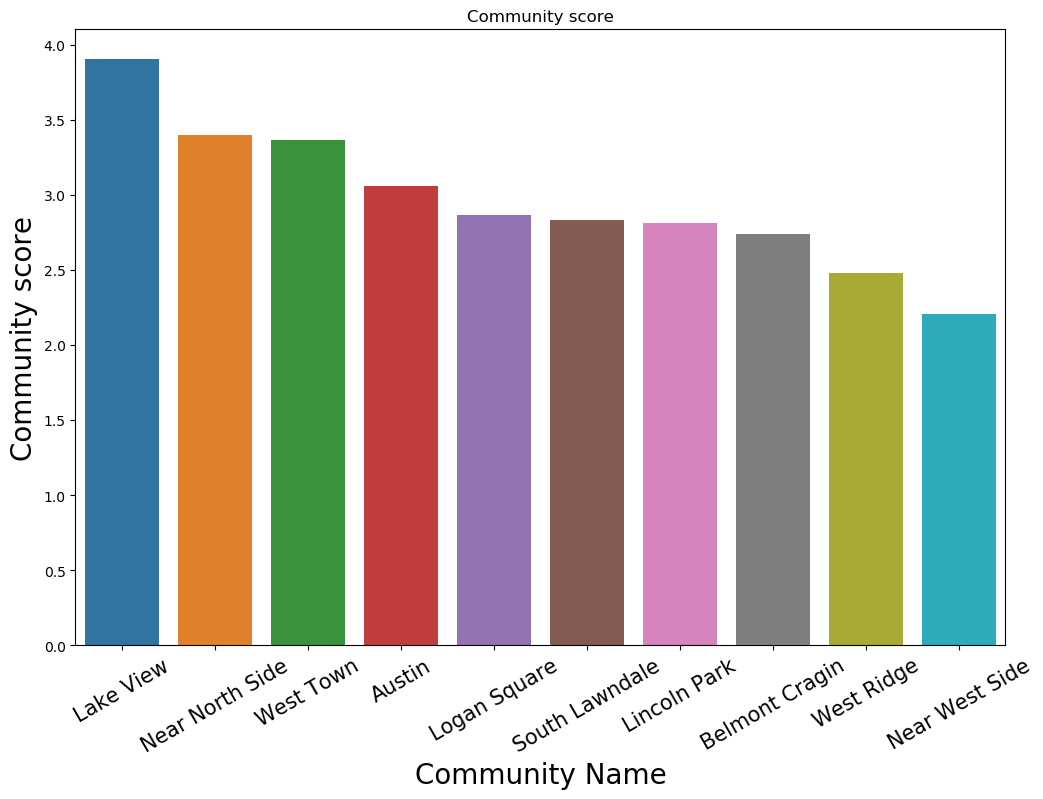

In [112]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (12,8))

sns.barplot(x = 'COMMUNITY AREA NAME',y = 'Total_score',  data = chicago_top_community )

index = np.arange(len(chicago_top_community['COMMUNITY AREA NAME']))
plt.xticks(index, chicago_top_community['COMMUNITY AREA NAME'], fontsize=15, rotation=30)
plt.xlabel('Community Name', fontsize=20)
plt.ylabel('Community score', fontsize=20)
plt.title('Community score')
plt.show()

In [117]:
import warnings
warnings.filterwarnings('ignore')
address = 'Chicago,Illinois'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Chicago,Illinois are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of Chicago,Illinois are 41.8755616, -87.6244212.


In [114]:
!pip install folium

     |████████████████████████████████| 92kB 8.1MB/s eta 0:00:011


In [116]:
chicago_top_community.columns

Index(['PostalCode', 'latitude', 'longitude', 'COMMUNITY AREA NAME',
       'Community Area Number', 'PER CAPITA INCOME ', 'Population',
       'Total_Kids', 'Total_Male', 'Total _Female', 'Total_score'],
      dtype='object')

In [121]:
import folium
# create map of chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
#for lat, lng, nei in zip(chi_neighborhood_income['latitude'], chi_neighborhood_income['longitude'], chi_neighborhood_income['COMMUNITY AREA NAME']):

for lat, lng, nei in zip(chicago_top_community['latitude'], chicago_top_community['longitude'], chicago_top_community['COMMUNITY AREA NAME']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [126]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [127]:
chicago_venues = getNearbyVenues(names=chicago_top_community['COMMUNITY AREA NAME'],
                                   latitudes=chicago_top_community['latitude'],
                                   longitudes=chicago_top_community['longitude']
                                  )

In [128]:
chicago_venues.shape

(615, 7)

In [129]:
chicago_venues.head()

,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lake View,41.9229,-87.6483,Swirlz Cupcakes,41.923668,-87.646759,Cupcake Shop
1,Lake View,41.9229,-87.6483,Toast,41.921851,-87.648115,Breakfast Spot
2,Lake View,41.9229,-87.6483,Kameya,41.921804,-87.648914,Japanese Restaurant
3,Lake View,41.9229,-87.6483,Rickshaw Republic,41.924123,-87.646898,Indonesian Restaurant
4,Lake View,41.9229,-87.6483,Athenian Room,41.921761,-87.649098,Greek Restaurant


In [130]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 166 uniques categories.


In [131]:
# One hot encoding

chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Community'] = chicago_venues['Community'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]
chicago_onehot.head()

,Community,Accessories Store,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Lake View,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lake View,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lake View,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lake View,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lake View,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
chicago_onehot.shape

(615, 167)

In [133]:
chicago_grouped = chicago_onehot.groupby('Community').mean().reset_index()
chicago_grouped.head()

,Community,Accessories Store,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Track,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Austin,0.00,0.000000,0.0,0.021505,0.00,0.00,0.010753,0.000000,0.0,...,0.010753,0.0,0.010753,0.0,0.0,0.00,0.0,0.010753,0.010753,0.010753
1,Belmont Cragin,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.029412,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000
2,Lake View,0.01,0.020000,0.0,0.000000,0.02,0.01,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.02,0.0,0.000000,0.010000,0.020000
3,Lincoln Park,0.00,0.041667,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.041667
4,Logan Square,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000


In [134]:
chicago_grouped.shape

(10, 167)

In [135]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [136]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community'] = chicago_grouped['Community']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Austin,Bar,Bakery,Italian Restaurant,Café,Salon / Barbershop,Mexican Restaurant,Pizza Place,Coffee Shop,Dive Bar,Cocktail Bar
1,Belmont Cragin,Fast Food Restaurant,Ice Cream Shop,Thai Restaurant,Italian Restaurant,Donut Shop,Pizza Place,Bakery,Hot Dog Joint,Asian Restaurant,Japanese Restaurant
2,Lake View,Coffee Shop,Pizza Place,Bar,Sandwich Place,Theater,Dessert Shop,Hot Dog Joint,Gym / Fitness Center,Music Venue,Mexican Restaurant
3,Lincoln Park,Bar,Yoga Studio,American Restaurant,Sandwich Place,Gym,Coffee Shop,Pizza Place,Outdoor Supply Store,Outdoors & Recreation,Burger Joint
4,Logan Square,Mexican Restaurant,Donut Shop,Ice Cream Shop,Coffee Shop,Restaurant,Sandwich Place,Pizza Place,Cuban Restaurant,Park,Convenience Store


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

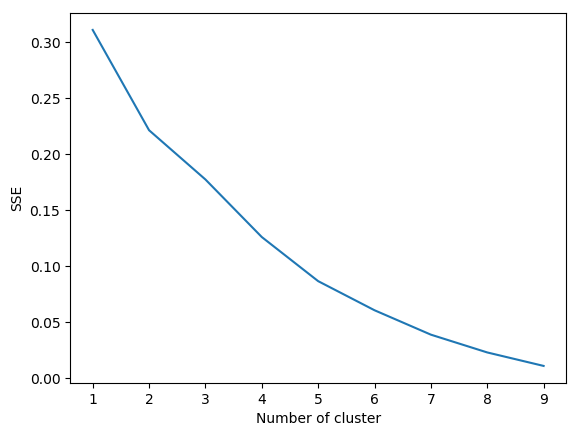

In [138]:

chicago_grouped_clustering = chicago_grouped.drop('Community', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(chicago_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [143]:
kclusters = 2

chicago_grouped_clustering = chicago_grouped.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
chicago_merged = chicago_top_community
# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each community
chicago_merged = chicago_merged.join(.set_index('C'), on='Neighborhood')

chicago_merged.head()# check the last columns!

In [155]:
chicago_top_community = chicago_top_community.rename(columns = {'COMMUNITY AREA NAME':'Community'})


In [158]:
chicago_merged = chicago_top_community

# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Community'), on='Community')

chicago_merged.head()# check the last columns!

,PostalCode,latitude,longitude,Community,Community Area Number,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
115,60614,41.9229,-87.6483,Lake View,6,60058,94368,2197,26264,24958,...,Coffee Shop,Pizza Place,Bar,Sandwich Place,Theater,Dessert Shop,Hot Dog Joint,Gym / Fitness Center,Music Venue,Mexican Restaurant
151,60611,41.8971,-87.6223,Near North Side,8,88669,80484,1404,17265,18734,...,Hotel,American Restaurant,New American Restaurant,Pizza Place,Restaurant,Clothing Store,Salon / Barbershop,Donut Shop,Italian Restaurant,Coffee Shop
240,60626,42.0095,-87.6689,West Town,24,43198,82236,2926,22675,20664,...,Mexican Restaurant,Pizza Place,Bar,Bakery,Theater,American Restaurant,Chinese Restaurant,Sandwich Place,Train Station,Park
21,60622,41.9019,-87.6779,Austin,25,15957,98514,6822,11217,13668,...,Bar,Bakery,Italian Restaurant,Café,Salon / Barbershop,Mexican Restaurant,Pizza Place,Coffee Shop,Dive Bar,Cocktail Bar
131,60639,41.9202,-87.7535,Logan Square,22,31908,72791,4012,16885,15706,...,Mexican Restaurant,Donut Shop,Ice Cream Shop,Coffee Shop,Restaurant,Sandwich Place,Pizza Place,Cuban Restaurant,Park,Convenience Store


In [160]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Community'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

['#8000ff', '#ff0000']


### Clusters are plotted

In [161]:
map_clusters

### Cluster 1

In [164]:
df1=chicago_merged.loc[chicago_merged['Cluster Labels'] == 0,chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]
df1

,latitude,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
131,41.9202,31908,72791,4012,16885,15706,2.865909,0,Mexican Restaurant,Donut Shop,Ice Cream Shop,Coffee Shop,Restaurant,Sandwich Place,Pizza Place,Cuban Restaurant,Park,Convenience Store
31,41.9463,15461,78743,6329,12528,11680,2.741171,0,Fast Food Restaurant,Ice Cream Shop,Thai Restaurant,Italian Restaurant,Donut Shop,Pizza Place,Bakery,Hot Dog Joint,Asian Restaurant,Japanese Restaurant


### Cluster 2

In [165]:
df2=chicago_merged.loc[chicago_merged['Cluster Labels'] == 1,chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]
df2

,latitude,PER CAPITA INCOME,Population,Total_Kids,Total_Male,Total _Female,Total_score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
115,41.9229,60058,94368,2197,26264,24958,3.905080,1,Coffee Shop,Pizza Place,Bar,Sandwich Place,Theater,Dessert Shop,Hot Dog Joint,Gym / Fitness Center,Music Venue,Mexican Restaurant
151,41.8971,88669,80484,1404,17265,18734,3.396873,1,Hotel,American Restaurant,New American Restaurant,Pizza Place,Restaurant,Clothing Store,Salon / Barbershop,Donut Shop,Italian Restaurant,Coffee Shop
240,42.0095,43198,82236,2926,22675,20664,3.365828,1,Mexican Restaurant,Pizza Place,Bar,Bakery,Theater,American Restaurant,Chinese Restaurant,Sandwich Place,Train Station,Park
21,41.9019,15957,98514,6822,11217,13668,3.058524,1,Bar,Bakery,Italian Restaurant,Café,Salon / Barbershop,Mexican Restaurant,Pizza Place,Coffee Shop,Dive Bar,Cocktail Bar
205,41.8515,10402,79288,6667,16250,10509,2.830602,1,Mexican Restaurant,Pizza Place,Music Venue,Miscellaneous Shop,Food,Brewery,Chinese Restaurant,Museum,Coffee Shop,Gas Station
122,41.9008,71551,64116,2084,13861,14421,2.809099,1,Bar,Yoga Studio,American Restaurant,Sandwich Place,Gym,Coffee Shop,Pizza Place,Outdoor Supply Store,Outdoors & Recreation,Burger Joint
231,42.0086,23040,71942,5208,10819,10416,2.478413,1,Convenience Store,Bar,Park,Currency Exchange,Liquor Store,Other Great Outdoors,Fast Food Restaurant,Fried Chicken Joint,Salon / Barbershop,Supermarket
163,41.8814,44689,54881,1710,12897,12554,2.209489,1,Coffee Shop,New American Restaurant,Greek Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Bar,BBQ Joint,Sandwich Place,Cocktail Bar
